In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!ls -l images/

total 3324
-rw-rw-r-- 1 ecbm4040 ecbm4040 284759 Dec  8 05:19 csjl.jpeg
-rw-rw-r-- 1 ecbm4040 ecbm4040 160407 Dec  5 19:35 guernica.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 183755 Dec  1 07:06 hk.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040 204053 Dec  4 04:17 nyc_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  21185 Dec  8 05:27 output_csjl_starry_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  19185 Dec  8 05:07 output_hk_guernica.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 173093 Dec  8 03:04 output.jpeg
-rw-rw-r-- 1 ecbm4040 ecbm4040  20839 Dec  8 05:20 output_tubingen_scream.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  14342 Dec  8 05:23 output_tubingen_seated_nude.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  15639 Dec  8 05:14 output_tubingen_shipwreck.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  25090 Dec  8 05:09 output_tubingen_somposition.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  21637 Dec  8 05:12 output_tubingen_starry_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 187647 Dec  8 05:17 scream.jpg
-rw-r--r-- 1 ecbm4040 ecbm4040 334862 Dec  4 04:17 se

hk.jpg was resized from (800, 600) to (300, 225)
guernica.jpg was resized from (462, 346) to (300, 224)
Iteration:0, total loss:1.4834647755175741e+22, content loss:15413000192.0, style loss:1.4834647825544485e+20
Iteration:100, total loss:4.829115586312185e+20, content loss:25607755776.0, style loss:4.82911554233172e+18
Iteration:200, total loss:1.876406488870431e+20, content loss:28155287552.0, style loss:1.8764064778753147e+18
Iteration:300, total loss:9.0216591520602e+19, content loss:29563340800.0, style loss:9.021659207035781e+17
Iteration:400, total loss:5.488731699336865e+19, content loss:30445424640.0, style loss:5.488731809288028e+17
Iteration:500, total loss:3.984746687292768e+19, content loss:31001729024.0, style loss:3.9847466185732915e+17
Iteration:600, total loss:3.2021998526464524e+19, content loss:31485095936.0, style loss:3.202199797670871e+17
Iteration:700, total loss:2.736949423836758e+19, content loss:31875311616.0, style loss:2.736949526915973e+17
Iteration:800, t

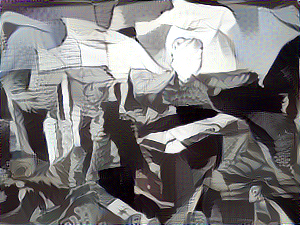

In [3]:
import stylize

content = 'hk.jpg'
style = 'guernica.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=5, beta=100, noise_ratio=0.6, new_width=300)

tubingen.jpg was resized from (960, 720) to (300, 225)
somposition.jpg was resized from (603, 400) to (300, 199)
Iteration:0, total loss:4.750909937019949e+23, content loss:7629085184.0, style loss:4.7509098750954544e+20
Iteration:100, total loss:3.8308127900121285e+21, content loss:23875155968.0, style loss:3.8308128603808727e+18
Iteration:200, total loss:1.613826786608873e+21, content loss:24956928000.0, style loss:1.6138267459269427e+18
Iteration:300, total loss:1.0191899987905914e+21, content loss:25581031424.0, style loss:1.0191899669047542e+18
Iteration:400, total loss:7.471653333167631e+20, content loss:26012076032.0, style loss:7.471653613543096e+17
Iteration:500, total loss:5.929474453768084e+20, content loss:26333753344.0, style loss:5.929474481255875e+17
Iteration:600, total loss:4.938310285089875e+20, content loss:26602414080.0, style loss:4.93831044726784e+17
Iteration:700, total loss:4.2483918954864784e+20, content loss:26828365824.0, style loss:4.2483919834474086e+17
Ite

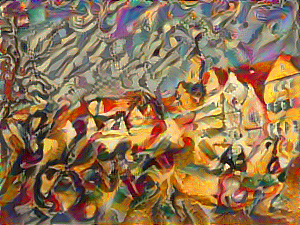

In [4]:
content = 'tubingen.jpg'
style = 'somposition.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=1000, noise_ratio=0.6, new_width=300)

tubingen.jpg was resized from (960, 720) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 237)
Iteration:0, total loss:2.1469122393716848e+23, content loss:7611179008.0, style loss:2.1469122098168123e+20
Iteration:100, total loss:2.417448118954446e+21, content loss:19933073408.0, style loss:2.417448112357376e+18
Iteration:200, total loss:1.1046205393407868e+21, content loss:21097619456.0, style loss:1.1046205085544612e+18
Iteration:300, total loss:6.369635874411465e+20, content loss:21819131904.0, style loss:6.369635786450534e+17
Iteration:400, total loss:4.240955678445504e+20, content loss:22252457984.0, style loss:4.2409555052724224e+17
Iteration:500, total loss:3.117219258642622e+20, content loss:22526085120.0, style loss:3.1172192311548314e+17
Iteration:600, total loss:2.4425105453276463e+20, content loss:22757945344.0, style loss:2.4425106209190707e+17
Iteration:700, total loss:2.0026144148498153e+20, content loss:22964457472.0, style loss:2.00261440110592e+17
I

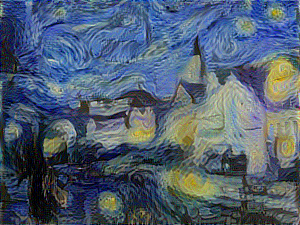

In [5]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=1000, noise_ratio=0.6, new_width=300)

tubingen.jpg was resized from (960, 720) to (300, 225)
shipwreck.jpg was resized from (700, 483) to (300, 207)
Iteration:0, total loss:9.706582155993791e+22, content loss:7564243456.0, style loss:9.706581888592563e+19
Iteration:100, total loss:2.8062801850573364e+21, content loss:16593496064.0, style loss:2.8062802290378015e+18
Iteration:200, total loss:9.849397014119737e+20, content loss:17276463104.0, style loss:9.849396986631946e+17
Iteration:300, total loss:4.209173283293941e+20, content loss:17699581952.0, style loss:4.20917343447679e+17
Iteration:400, total loss:2.2274789683225638e+20, content loss:18062895104.0, style loss:2.2274789600762266e+17
Iteration:500, total loss:1.4424568691193335e+20, content loss:18336919552.0, style loss:1.4424568636217754e+17
Iteration:600, total loss:1.0742970993622594e+20, content loss:18541047808.0, style loss:1.0742970773720269e+17
Iteration:700, total loss:8.704561757828206e+19, content loss:18710329344.0, style loss:8.704562115169485e+16
Itera

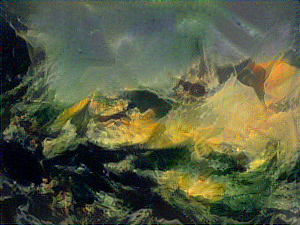

In [6]:
content = 'tubingen.jpg'
style = 'shipwreck.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=1000, noise_ratio=0.6, new_width=300)

tubingen.jpg was resized from (960, 720) to (300, 225)
scream.jpg was resized from (640, 795) to (300, 372)
Iteration:0, total loss:4.34979944829598e+22, content loss:7583170560.0, style loss:4.3497992371897473e+20
Iteration:100, total loss:1.2023421773302622e+21, content loss:26885212160.0, style loss:1.202342133349797e+19
Iteration:200, total loss:4.827357423238906e+20, content loss:28658448384.0, style loss:4.827357423238906e+18
Iteration:300, total loss:2.612977068879433e+20, content loss:29759391744.0, style loss:2.6129770139038515e+18
Iteration:400, total loss:1.6343761839429832e+20, content loss:30389123072.0, style loss:1.6343762059332157e+18
Iteration:500, total loss:1.1262161263867724e+20, content loss:30831216640.0, style loss:1.1262160851550863e+18
Iteration:600, total loss:8.360219345069225e+19, content loss:31184994304.0, style loss:8.360219125166899e+17
Iteration:700, total loss:6.58114356062999e+19, content loss:31457501184.0, style loss:6.581143340727665e+17
Iteration:

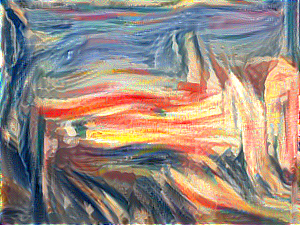

In [7]:
content = 'tubingen.jpg'
style = 'scream.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=100, noise_ratio=0.6, new_width=300)

tubingen.jpg was resized from (960, 720) to (300, 225)
seated_nude.jpg was resized from (576, 750) to (300, 390)
Iteration:0, total loss:1.6873288820797823e+22, content loss:7533547520.0, style loss:1.6873288398585358e+20
Iteration:100, total loss:1.098069490732823e+21, content loss:19202031616.0, style loss:1.098069508325009e+19
Iteration:200, total loss:2.6415518807495174e+20, content loss:20291715072.0, style loss:2.641551946720215e+18
Iteration:300, total loss:7.41611093154448e+19, content loss:21173358592.0, style loss:7.416111096471224e+17
Iteration:400, total loss:3.2978954073652855e+19, content loss:21647155200.0, style loss:3.2978954485969715e+17
Iteration:500, total loss:2.1789125281730003e+19, content loss:21933223936.0, style loss:2.1789125006852096e+17
Iteration:600, total loss:1.7119166246542115e+19, content loss:22022524928.0, style loss:1.7119165834225254e+17
Iteration:700, total loss:1.3571010337871757e+19, content loss:22209929216.0, style loss:1.3571010887627571e+17


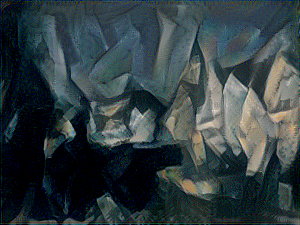

In [8]:
content = 'tubingen.jpg'
style = 'seated_nude.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=100, noise_ratio=0.6, new_width=300)

csjl.jpeg was resized from (1600, 1200) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 237)
Iteration:0, total loss:1.78779461961721e+22, content loss:13508365312.0, style loss:1.7877946477647076e+20
Iteration:100, total loss:2.1720160833803334e+20, content loss:24921964544.0, style loss:2.1720160888778916e+18
Iteration:200, total loss:1.0613976289451914e+20, content loss:26954223616.0, style loss:1.0613976069549588e+18
Iteration:300, total loss:6.463244248197523e+19, content loss:28089364480.0, style loss:6.463244083270779e+17
Iteration:400, total loss:4.435239471034453e+19, content loss:28939384832.0, style loss:4.435239553497825e+17
Iteration:500, total loss:3.309794981908054e+19, content loss:29614604288.0, style loss:3.309794913188577e+17
Iteration:600, total loss:2.622008897194636e+19, content loss:30129408000.0, style loss:2.622008814731264e+17
Iteration:700, total loss:2.162103194407561e+19, content loss:30535380992.0, style loss:2.1621032012795085e+17
Iter

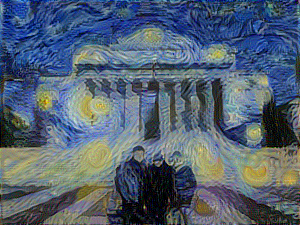

In [9]:
content = 'csjl.jpeg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=2.0, iterations=1001, 
              alpha=1, beta=100, noise_ratio=0.6, new_width=300)